# **Google Runoff Reanalysis & Reforecast dataset (GRRR) extraction**

This notebook is complementary to the colab (https://colab.research.google.com/drive/1FnXXSEQqU1TJhMPiNeWUTr9LnbJwZzMm?usp=sharing) which facilitates reading the GRRR.

GRRR consists of hydrologic predictions by Google state-of-the-art (SOTA) hydrologic model, an improved version of the model described in the Nature article (https://www.nature.com/articles/s41586-024-07145-1), with full global coverage and daily resolution. It includes:
* Streamflow reanalysis data for ±1M hybas's (hydrological basin) for 1980 - 2023, on which, too, return period values are based and calculated (the ‘severity threshold levels’ we already knew);
* Streamflow reforecast data for ±1M hybas's for 2016 - 2022, with 7-day lead times.


##### **Step-by-step plan for the analysis:**

- Make a list of all new hybas locations (of interest?). After the update, a **lot** of new stations have been added to FloodHub, 10^2 - 10^3 ish range. To download this manually would be extremely tedious, so maybe Google can help with this. It would be good to automate this for later as well, of course. Maybe there's a way to get all hybas stations in the colab.
- Think of a method (which finishes the downloads and then goes to the next one, or do the analysis in colab) which efficiently handles all data. Then, download all data for the hybases with the colab
- With the data ready, make functions and do the "easy" part: the rest of the analysis

*NB:* Having the "Better Comments" extension installed is adviced for reading some of the comments

##### **Extract Mali data**

In [142]:
import analyse

In [143]:
df_Mali_gauges, df_Mali_gauge_models, df_Mali_forecasts = \
    analyse.get_country_data('Mali','2024-07-08', '2024-10-08')

In [144]:
print(df_Mali_gauges['gaugeId'])

0     hybas_1120641660
1     hybas_1120650110
2     hybas_1120661040
3     hybas_1120679780
4     hybas_1120689830
5     hybas_1120705070
6     hybas_1120737100
7     hybas_1120739110
8     hybas_1120758950
9     hybas_1120766460
10    hybas_1121890140
11    hybas_1121893090
12    hybas_1121895840
13    hybas_1121900350
14    hybas_1121905290
15    hybas_1121919510
Name: gaugeId, dtype: object


Replace the comment-block (1) with comment-block (2) in colab (of the aforementioned URL) for the Mali data to download

In [145]:
""" comment-block (1)
gauge_reforecast_ds = reforecast_ds.sel(gauge_id=hybas_id).compute()
gauge_reanalysis_ds = reanalysis_ds.sel(gauge_id=hybas_id).compute()
gauge_return_periods_ds = return_periods_ds.sel(gauge_id=hybas_id).compute()
"""

""" comment-block (2)
Mali_hybases = [
  'hybas_1120641660',
  'hybas_1120650110',
  'hybas_1120661040',
  'hybas_1120679780',
  'hybas_1120689830',
  'hybas_1120705070',
  'hybas_1120737100',
  'hybas_1120739110',
  'hybas_1120758950',
  'hybas_1120766460',
  'hybas_1121890140',
  'hybas_1121893090',
  'hybas_1121895840',
  'hybas_1121900350',
  'hybas_1121905290',
  'hybas_1121919510'
]

for hybas_id in Mali_hybases:
  gauge_reforecast_ds = reforecast_ds.sel(gauge_id = hybas_id).compute()
  gauge_reanalysis_ds = reanalysis_ds.sel(gauge_id = hybas_id).compute()
  gauge_return_periods_ds = return_periods_ds.sel(gauge_id = hybas_id).compute()

  gauge_reforecast_ds.to_netcdf(f'{hybas_id}_reforecast_ds.nc')
  gauge_reanalysis_ds.to_netcdf(f'{hybas_id}_reanalysis_ds.nc')
  gauge_return_periods_ds.to_netcdf(f'{hybas_id}_return_periods_ds.nc')

  files.download(f'{hybas_id}_reforecast_ds.nc')
  files.download(f'{hybas_id}_reanalysis_ds.nc')
  files.download(f'{hybas_id}_return_periods_ds.nc')
"""

" comment-block (2)\nMali_hybases = [\n  'hybas_1120641660',\n  'hybas_1120650110',\n  'hybas_1120661040',\n  'hybas_1120679780',\n  'hybas_1120689830',\n  'hybas_1120705070',\n  'hybas_1120737100',\n  'hybas_1120739110',\n  'hybas_1120758950',\n  'hybas_1120766460',\n  'hybas_1121890140',\n  'hybas_1121893090',\n  'hybas_1121895840',\n  'hybas_1121900350',\n  'hybas_1121905290',\n  'hybas_1121919510'\n]\n\nfor hybas_id in Mali_hybases:\n  gauge_reforecast_ds = reforecast_ds.sel(gauge_id = hybas_id).compute()\n  gauge_reanalysis_ds = reanalysis_ds.sel(gauge_id = hybas_id).compute()\n  gauge_return_periods_ds = return_periods_ds.sel(gauge_id = hybas_id).compute()\n\n  gauge_reforecast_ds.to_netcdf(f'{hybas_id}_reforecast_ds.nc')\n  gauge_reanalysis_ds.to_netcdf(f'{hybas_id}_reanalysis_ds.nc')\n  gauge_return_periods_ds.to_netcdf(f'{hybas_id}_return_periods_ds.nc')\n\n  files.download(f'{hybas_id}_reforecast_ds.nc')\n  files.download(f'{hybas_id}_reanalysis_ds.nc')\n  files.download(f'{h

This method is not robust, and due to many reoccuring downloads possible overloading colabs RAM or whatever, some files fail to download. This can probably worked around by using time.sleep() or some outer loop with a lag, but the safest option is to download one-by-one by uncommenting hybas ID's:

In [146]:
""" 
# hybas_id = 'hybas_1120641660'
# hybas_id = 'hybas_1120650110'
# hybas_id = 'hybas_1120661040'
# hybas_id = 'hybas_1120679780'
# hybas_id = 'hybas_1120689830'
# hybas_id = 'hybas_1120705070'
# hybas_id = 'hybas_1120737100'
# hybas_id = 'hybas_1120739110'
# hybas_id = 'hybas_1120758950'
# hybas_id = 'hybas_1120766460'
# hybas_id = 'hybas_1121890140'
# hybas_id = 'hybas_1121893090'
# hybas_id = 'hybas_1121895840'
# hybas_id = 'hybas_1121900350'
# hybas_id = 'hybas_1121905290'
# hybas_id = 'hybas_1121919510'
"""

" \n# hybas_id = 'hybas_1120641660'\n# hybas_id = 'hybas_1120650110'\n# hybas_id = 'hybas_1120661040'\n# hybas_id = 'hybas_1120679780'\n# hybas_id = 'hybas_1120689830'\n# hybas_id = 'hybas_1120705070'\n# hybas_id = 'hybas_1120737100'\n# hybas_id = 'hybas_1120739110'\n# hybas_id = 'hybas_1120758950'\n# hybas_id = 'hybas_1120766460'\n# hybas_id = 'hybas_1121890140'\n# hybas_id = 'hybas_1121893090'\n# hybas_id = 'hybas_1121895840'\n# hybas_id = 'hybas_1121900350'\n# hybas_id = 'hybas_1121905290'\n# hybas_id = 'hybas_1121919510'\n"

Now, download the manually added data (after putting it in folders (manually or with os/shutil package))

In [147]:
import xarray as xr

In [148]:
# First, try one hybas_id to test:
hybas_id = 'hybas_1120641660'

ds_reanalysis_1120641660 = xr.open_dataset(f'../data/GRRR/reanalysis/{hybas_id}_reanalysis_ds.nc')
ds_reforecast_1120641660 = xr.open_dataset(f'../data/GRRR/reforecast/{hybas_id}_reforecast_ds.nc')
ds_return_ps_1120641660 = xr.open_dataset(f'../data/GRRR/return_periods/{hybas_id}_return_periods_ds.nc')

In [149]:
print(type(ds_reanalysis_1120641660))

<class 'xarray.core.dataset.Dataset'>


In [ ]:
# Now, download for all hybases:
dict_ds_data_Mali = {}
for hybas in df_Mali_gauges['gaugeId']:
    ds_reanalysis = xr.open_dataset(f'../data/GRRR/reanalysis/{hybas}_reanalysis_ds.nc')
    ds_reforecast = xr.open_dataset(f'../data/GRRR/reforecast/{hybas}_reforecast_ds.nc')
    ds_return_ps = xr.open_dataset(f'../data/GRRR/return_periods/{hybas}_return_periods_ds.nc')

    dict_ds_data_Mali[hybas] = {'reanalysis': ds_reanalysis,
                                'reforecast': ds_reforecast,
                                'return_periods': ds_return_ps}

Some plotting functions/utils (partly copied from the same notebook):

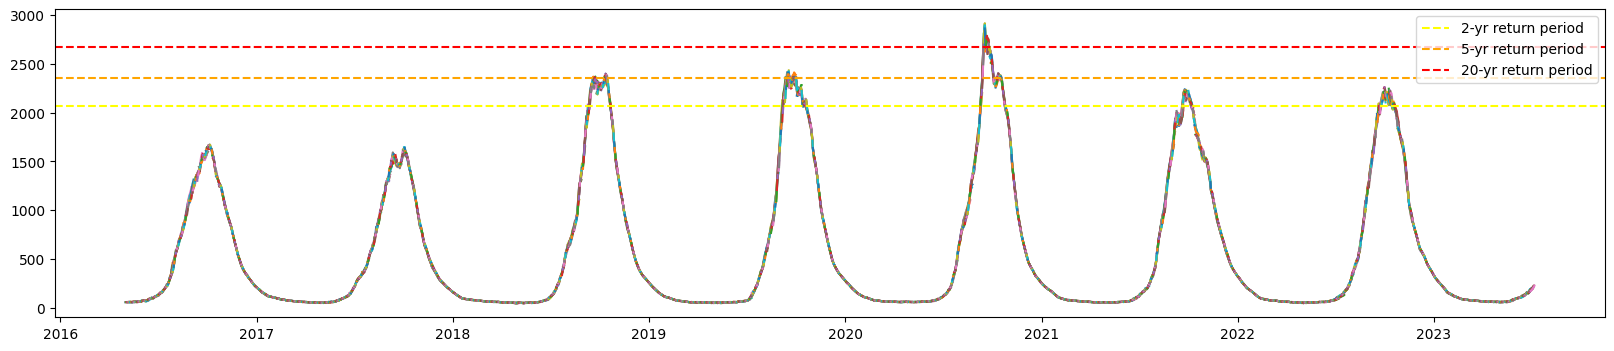

In [151]:
issue_time_start_date = '2016-05-01'
issue_time_end_date = '2024-10-30'

analyse.plot_reforecast(issue_time_start_date, issue_time_end_date,
                        ds_reforecast_1120641660, ds_return_ps_1120641660)

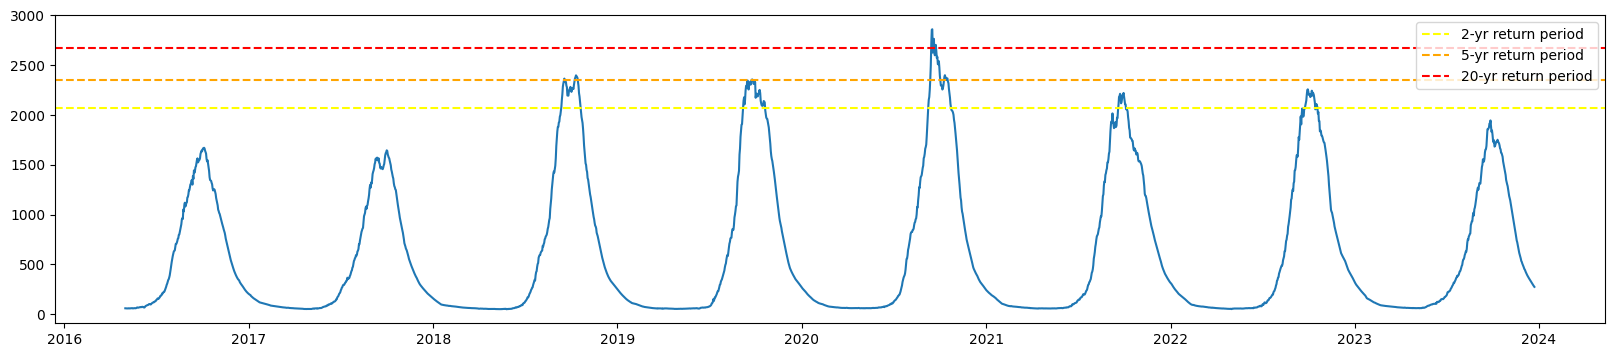

In [152]:
issue_time_start_date = '2016-05-01'
issue_time_end_date = '2024-10-30'

analyse.plot_reanalysis(issue_time_start_date, issue_time_end_date,
                        ds_reanalysis_1120641660, ds_return_ps_1120641660)

In [153]:
# # Plot all reanalysis data for Mali, 2016 - 2024:
# issue_time_start_date = '2016-05-01'
# issue_time_end_date = '2024-10-30'

# for hybas_id in dict_ds_data_Mali.keys():
#     ds_reanalysis = dict_ds_data_Mali[hybas_id]['reanalysis']
#     ds_return_ps = dict_ds_data_Mali[hybas_id]['return_periods']

#     analyse.plot_reanalysis(issue_time_start_date, issue_time_end_date,
#                             ds_reanalysis, ds_return_ps)

In [154]:
# # Plot all reforecast data for Mali, 2016 - 2024:
# issue_time_start_date = '2016-05-01'
# issue_time_end_date = '2024-10-30'

# for hybas_id in dict_ds_data_Mali.keys():
#     ds_reforecast = dict_ds_data_Mali[hybas_id]['reforecast']
#     ds_return_ps = dict_ds_data_Mali[hybas_id]['return_periods']

#     analyse.plot_reforecast(issue_time_start_date, issue_time_end_date,
#                             ds_reforecast, ds_return_ps)

##### **Create flood events**

We take all available (re)forecast data for a gauge, and loop through it to create "flood events"; periods of consecutive flooding in an administrative unit. A flood event is "triggered" once the maximum 7-day lead time predicted discharge in an administrative unit surpasses the 5-yr return period threshold. To come to a list of flood events, we'll:
- define a function that takes classifies data into an administrative unit
- define a function that takes all gauges in an administrative unit and returns the aggregated maximum (or another statistic) of the unit
- define a function that, given a timeseries of (maximum) forecast values, creates flood events

In [155]:
type(ds_reforecast_1120641660)
ds_reforecast_1120641660

<xarray.Dataset>
Dimensions:     (issue_time: 2738, lead_time: 8)
Coordinates:
  * issue_time  (issue_time) datetime64[ns] 2016-01-01 2016-01-02 ... 2023-06-30
    gauge_id    object ...
  * lead_time   (lead_time) timedelta64[ns] 0 days 1 days ... 6 days 7 days
Data variables:
    streamflow  (issue_time, lead_time) float32 ...

In [156]:
# initialise all reforecast and return periods datasets available for Mali
# by making a dictionary with the hybas ID as the key

In [157]:
# To automate the classification of the gauges into administrative units,
# we first need to add coordinates to of every gauge dataset
from typing import Dict
import pandas as pd
import xarray as xr


def get_country_gauge_coords(country: str) -> pd.DataFrame:
    """
    Get the coordinates of the gauges in a country, stored in data/ folder

    :param country: name of the country
    :return: DataFrame with the gaugeId, latitude and longitude
    """
    if country[0].islower():
        country = country.capitalize()
    return pd.read_csv(f'../data/processed/gauge_coords/{country}_gauge_coords.csv',
                       index_col = None, sep = ';', decimal = '.')


def assign_coords_to_datasets(
        datasets: Dict[str, xr.Dataset], country: str
    ) -> xr.Dataset:
    """
    Takes a dict of datasets and assigns their coordinates, which it gets
    from get_country_gauge_coords(), and assigns it to each dataset. The
    dict contains the names of the datasets as keys and the datasets as values

    :param datasets: dict of datasets
    :param country: name of the country
    :return: dict of datasets with coordinates
    """
    df_coords = get_country_gauge_coords(country)

    for gauge_id, dataset in datasets.items():
        # assumes full name, e.g. 'hybas_1120661040', in df_coords, thus creating
        # a comparison of solely the hybas numbers, not the full name or dataset identifier
        coords = df_coords[
            df_coords['gaugeId'].apply(lambda x: x.split('_')[-1]) == gauge_id.split('_')[-1]
        ]

        if not coords.empty:
            # add the coordinates to the dataset as attributes
            dataset.attrs['latitude'] = coords['latitude'].values[0]
            dataset.attrs['longitude'] = coords['longitude'].values[0]
            # add the hybas_id to the dataset as well (e.g. '1120661040')
            dataset.attrs['gauge_id'] = gauge_id.split('_')[-1]
        else:
            print(f'No coordinates found for gauge {gauge_id}') 

    return datasets

In [158]:
# create the dictionary with dataset names as keys and the datasets as values
dict_datasets = {name: value for name, value in globals().items() if name.startswith('ds_reforecast_')}
print(dict_datasets)

{'ds_reforecast_1120641660': <xarray.Dataset>
Dimensions:     (issue_time: 2738, lead_time: 8)
Coordinates:
  * issue_time  (issue_time) datetime64[ns] 2016-01-01 2016-01-02 ... 2023-06-30
    gauge_id    object ...
  * lead_time   (lead_time) timedelta64[ns] 0 days 1 days ... 6 days 7 days
Data variables:
    streamflow  (issue_time, lead_time) float32 ...}


In [169]:
# get all reforecast datasets for Mali from dict_ds_data_Mali and change
# they key from hybas_... to ds_reforecast_...
dict_datasets = {key: value['reforecast'] for key, value in dict_ds_data_Mali.items()}
dict_datasets = {key.replace('hybas_', 'ds_reforecast_'): value for key, value in dict_datasets.items()}
print(dict_datasets.keys())

dict_keys(['ds_reforecast_1120641660', 'ds_reforecast_1120650110', 'ds_reforecast_1120661040', 'ds_reforecast_1120679780', 'ds_reforecast_1120689830', 'ds_reforecast_1120705070', 'ds_reforecast_1120737100', 'ds_reforecast_1120739110', 'ds_reforecast_1120758950', 'ds_reforecast_1120766460', 'ds_reforecast_1121890140', 'ds_reforecast_1121893090', 'ds_reforecast_1121895840', 'ds_reforecast_1121900350', 'ds_reforecast_1121905290', 'ds_reforecast_1121919510'])


In [ ]:
# With the coordinates added, we can classify the gauges into administrative units
import analyse
from typing import Dict
import warnings
import pandas as pd
import geopandas as gpd
import xarray as xr


def create_coords_df_from_ds(dict_ds: Dict[str, xr.Dataset]) -> pd.DataFrame:
    """
    Create a DataFrame with all gauge ID's and coordinates in a
    dictionary with xarray Datasets

    :param dict_ds: xarray Dataset
    :return: DataFrame with the coordinates
    """
    return pd.DataFrame([
        {
            'gauge_id': ds.attrs['gauge_id'],
            'longitude': ds.attrs['longitude'],
            'latitude': ds.attrs['latitude']
        }
        for ds in dict_ds.values()
    ])


def assure_admin_units_assigned(dict_ds: Dict[str, xr.Dataset]) -> None:
    """
    Check if all datasets have been assigned an admin unit

    :param dict_ds: dict of datasets
    """
    for ds in dict_ds.values():
        if 'admin_unit' not in ds.attrs:
            print(f'No admin unit assigned to dataset {ds.attrs["gauge_id"]}')
            continue
        admin_unit = ds.attrs['admin_unit']
        if any(pd.isna(unit) for unit in admin_unit):
            print(f'No admin unit assigned to dataset {ds.attrs["gauge_id"]} (NaN found)')


def handle_NaN_admin_units(codes: pd.Series) -> list:
    """
    Handle NaN values in the series of administrative unit assignments for gauges

    :param codes: Series containing administrative unit codes (ADM2_PCODE) for a gauge
    :return: list of valid administrative unit codes (ADM2_PCODE)
    """
    if codes.isna().any():
        print(f"Warning: Found NaN in administrative unit assignment "
              f"for gauge IDs: {codes[codes.isna()].index.tolist()}")
    return list(codes.dropna())


def assign_admin_unit_to_datasets(
        dict_ds: Dict[str, xr.Dataset],
        country: str = 'Mali',
        verbose: bool = True,
        # Path to the shape file with admin level 2 units for Mali
        path: str = 'mali_ALL/mli_adm_ab_shp/mli_admbnda_adm2_1m_gov_20211220.shp',
        buffer_radius: int = 5000
    ) -> Dict[str, xr.Dataset]:
    """
    Assigns the administrative unit to each dataset in the dictionary by:
    (1) assiging coordinates to the datasets, with assign_coords_to_datasets(),
        which takes information queried by ListGauges() in the 'extract' package
    (2) creating a GeoDataFrame from the dataset coordinates, which includes a
        5 km buffer around the gauges, to account for shape file inaccuracies and,
        more importantly, the fact that gauges are usually located in rivers, which,
        in turn, are usually borders between administrative units, causing gauges to
        be located in only onr of the units, while they effectively tell about both.
        With a buffer, this is accounted for, and, as a result, gauges can be assigned
        to multiple administrative units, if they simply intersect with multiple units
    (3) creating a GeoDataFrame from the shape file with the admin units, source:
        (https://www.naturalearthdata.com/downloads/10m-cultural-vectors/10m-admin-0-countries/)
    (4) classifying the gauges into the administrative units by joining the two above
    (5) adding the admin unit names to the datasets by matching the gauge ID's and
        the found administrative units
    (6) returning the updated dictionary with the datasets, with datasets that now have
        the attributes 'longitude', 'latitude', and 'admin_unit'

    :param dict_ds: dict of datasets
    :param country: name of the country
    :param verbose: whether to print some test print-s's
    :param path: path to the shape file with the admin units
    :param buffer_radius: radius of the buffer around the gauges, standard is 5 km
    :return: dict of datasets with administrative units
    """
    #* (1): assign coordinates to the datasets
    dict_ds = assign_coords_to_datasets(dict_ds, country)
    # print(next(iter(dict_ds.items()))) if verbose else None

    #* (2): create a GeoDataFrame from the dataset coordinates;
    # geometry is a point for each gauge, with coords (x, y)
    df_gauge_coords = create_coords_df_from_ds(dict_ds)
    gpd_Mali_gauge_coords = gpd.GeoDataFrame(
        df_gauge_coords,
        geometry = gpd.points_from_xy(
            df_gauge_coords['longitude'], df_gauge_coords['latitude']
        ),
        crs = 'EPSG:4326'
    )
    # add a buffer of 5 km around the points to account for inaccuracies,
    # where 1 degree is approx. 111,32 km at the equator, so in degrees (which
    # we have to use as the coordinate system is WGS84), 5 km is 5000 meter \
    # divided by 111.320 meters (5000 / 111320). This is a rough estimate, but
    # should be sufficient, since the number of 5 km is too mostly arbirtrary.
    # Also, surpress the warning that the buffer is not exact, as we are aware
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        gpd_Mali_gauge_coords['geometry'] = \
            gpd_Mali_gauge_coords.geometry.buffer(buffer_radius / 111320)

    #* (3): read the shape file into a GeoDataFrame and convert it to WGS84
    # (which is the coordinate system used by the gauge data)
    gpd_adm_units_Mali = analyse.get_shape_file(path).to_crs('EPSG:4326')
    # check if the coord systems are the same
    if gpd_adm_units_Mali.crs != gpd_Mali_gauge_coords.crs:
        gpd_adm_units_Mali = gpd_adm_units_Mali.to_crs(gpd_Mali_gauge_coords.crs)
    analyse.assert_same_coord_system(gpd_adm_units_Mali, gpd_Mali_gauge_coords)

    #* (4) now we can classify the gauges into the administrative units:
    # creating a joined dataframe with the gauges as basis, meaning
    # that gauges get assigned to the admin unit they are within,
    # including their metadata (such as the shape of the admin unit).
    # (And, thus, the rest of the admin units are not considered.)
    gpd_gauges_classified = gpd.sjoin(
        gpd_Mali_gauge_coords, gpd_adm_units_Mali,
        how = 'left',           # joins left, i.e. the gauges serve as basis
                                # checks if the gauge intersects with the admin unit
        predicate = 'intersects',
        lsuffix = 'gauge', rsuffix = 'adm'
    )
    print(gpd_gauges_classified.head(1)) if verbose else None
    # make a mapping of the gauge ID's and the admin unit names:
    # group by gauge ID; select the admin unit names; check for NaNs;
    # convert to list; then dictionary with {gauge_id: [admin_unit]}
    mapping = gpd_gauges_classified.groupby('gauge_id')['ADM2_PCODE']\
        .apply(handle_NaN_admin_units).to_dict()

    #* (5) lastly, we add the admin unit names to the datasets
    print(mapping) if verbose else None
    for gauge_id, admin_units in mapping.items():
        dict_ds[f'ds_reforecast_{gauge_id}'].attrs['admin_unit'] = admin_units

    #* (6) check result and return
    assure_admin_units_assigned(dict_ds)
    print('\n\n', next(iter(dict_ds.items()))) if verbose else None
    return dict_ds

In [232]:
dict_datasets = assign_admin_unit_to_datasets(dict_datasets)

     gauge_id  longitude  latitude  \
0  1120641660   -4.20625  14.50625   

                                            geometry  index_adm  Shape_Leng  \
0  POLYGON ((-4.16133 14.50625, -4.16155 14.50185...         33    5.438311   

   Shape_Area ADM2_FR ADM2_PCODE ADM2_REF ADM2ALT1FR ADM2ALT2FR ADM1_FR  \
0    0.611429   Mopti     ML0506     None       None       None   Mopti   

  ADM1_PCODE    ADM0_FR ADM0_PCODE       date    validOn     validTo  
0       ML05  Mali (le)         ML 2015-06-01 2021-12-20  0000/00/00  
{'1120641660': ['ML0506'], '1120650110': ['ML0201', 'ML0207'], '1120661040': ['ML0201'], '1120679780': ['ML0406'], '1120689830': ['ML0206', 'ML0401'], '1120705070': ['ML0206'], '1120737100': ['ML0203', 'ML0204'], '1120739110': ['ML0202', 'ML0305'], '1120758950': ['ML0303', 'ML0301', 'ML0305'], '1120766460': ['ML0306'], '1121890140': ['ML0506'], '1121893090': ['ML0507'], '1121895840': ['ML0403'], '1121900350': ['ML0406'], '1121905290': ['ML0206', 'ML0401', 'ML0406'], 

In [230]:
print(dict_datasets['ds_reforecast_1120766460'])

<xarray.Dataset>
Dimensions:     (issue_time: 2738, lead_time: 8)
Coordinates:
  * issue_time  (issue_time) datetime64[ns] 2016-01-01 2016-01-02 ... 2023-06-30
    gauge_id    object ...
  * lead_time   (lead_time) timedelta64[ns] 0 days 1 days ... 6 days 7 days
Data variables:
    streamflow  (issue_time, lead_time) float32 ...
Attributes:
    latitude:    11.22291666666553
    longitude:   -8.485416666669321
    gauge_id:    1120766460
    admin_unit:  ['ML0306']


In [256]:
import matplotlib.pyplot as plt


def plot_admin_units_with_gauges(
        dict_ds: Dict[str, xr.Dataset],
        path = 'mali_ALL/mli_adm_ab_shp/mli_admbnda_adm2_1m_gov_20211220.shp'
    ) -> None:
    """
    Plot the administrative units of a country with the gauges contained in them

    :param dict_ds: dict of datasets
    :param path: path to the shape file with the admin units
    """
    # create a GeoDataFrame with the coordinates of the gauges
    # (code copied from assign_admin_unit_to_datasets())
    df_gauge_coords = create_coords_df_from_ds(dict_ds)
    gpd_Mali_gauge_coords = gpd.GeoDataFrame(
        df_gauge_coords,
        geometry = gpd.points_from_xy(
            df_gauge_coords['longitude'], df_gauge_coords['latitude']
        ),
        crs = 'EPSG:4326'
    )
    # add a buffer of 5 km around the points to account for inaccuracies,
    # where 1 degree is approx. 111,32 km at the equator, so in degrees (which
    # we have to use as the coordinate system is WGS84), 5 km is 5000 meter \
    # divided by 111.320 meters (5000 / 111320). This is a rough estimate, but
    # should be sufficient, since the number of 5 km is too mostly arbirtrary.
    # Also, surpress the warning that the buffer is not exact, as we are aware
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        gpd_Mali_gauge_coords['geometry'] = \
            gpd_Mali_gauge_coords.geometry.buffer(5000 / 111320)
        
    # make a GeoDataFrame with the administrative units
    gpd_adm_units_Mali = analyse.get_shape_file(path).to_crs('EPSG:4326')
    # A quick intermediary plot to see which admin units are contained in the datasets:
    # We want to make a plot where each administrative unit with a gauge gets a tinted
    # colour. Thus, we now join the GeoDataFrames the other way around
    gpd_adm_units_with_gauges = gpd.sjoin(
        gpd_adm_units_Mali, gpd_Mali_gauge_coords,
        how = 'left',
        predicate = 'intersects', # see if they intersect with one another
        lsuffix = 'adm', rsuffix = 'gauge'
    )

    print('Administrative units in Mali:', len(gpd_adm_units_Mali))
    # Drop the column where index_gauge (aka index_right) is NaN,
    # because that means that the admin unit does not contain a gauge
    gpd_adm_units_with_gauges = gpd_adm_units_with_gauges.dropna(subset = ['index_gauge'])
    # 15 gauges left, so there's one administrative unit with two gauges
    print('Administrative units with a gauge: ', end = '')
    print(len(gpd_adm_units_with_gauges['ADM2_PCODE'].unique()))
    # Plot using 510 colours
    red, blue = '#DB0A13', '#092448'
    fig, ax = plt.subplots(figsize = (10, 10))
    gpd_adm_units_Mali.plot(ax = ax, color = blue)
    gpd_adm_units_with_gauges.plot(ax = ax, color = red)
    # The coordinates of gauge 1120766460 seem to be slightly off, and
    # coincidentally, it is placed outside of Mali and not within an admin unit   
    # ax.plot(-8.485416666669321, 11.22291666666553, 'go', markersize = 2)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('Administrative units with gauges in Mali')
    plt.show()

Administrative units in Mali: 53
Administrative units with a gauge: 15


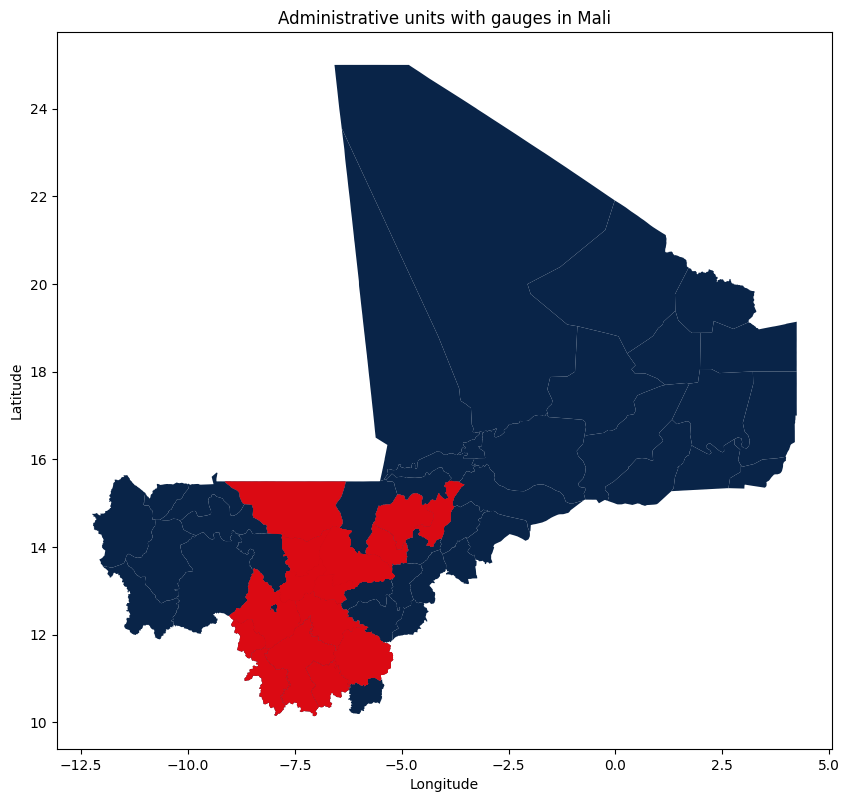

In [257]:
plot_admin_units_with_gauges(dict_datasets)

In [ ]:
# With the datasets classified into admin units, we will now aggregate
# the data per admin unit and create a dataset with just the maximum value of
# the reforecast data at each possible timestep available in the datasets for
# each admin units (resulting in one dataset per admin unit)
def create_admin_unit_set(dict_ds: Dict[str, xr.Dataset]) -> set:
    """
    Create a unique set of the admin units in the datasets

    :param dict_ds: dict of datasets
    :return: set of admin units
    """
    admin_units = set()
    for ds in dict_ds.values():
        if 'admin_unit' in ds.attrs:
            if ds.attrs['admin_unit'] is None:
                print(f'No admin unit found in dataset {ds.attrs["gauge_id"]}')
            else:
                admin_units.update(ds.attrs['admin_unit'])
        else:
            raise ValueError('No admin unit found in dataset')
    return admin_units


def pretty_print_list(l: list) -> None:
    """
    Pretty print a list

    :param l: list
    """
    print(', '.join(l))


def subset_lead_time(ds: xr.Dataset, lt: int) -> xr.Dataset:
    """
    Subset the dataset to a certain lead time

    :param ds: xarray Dataset
    :param lt: lead time to subset to
    :return: xarray Dataset with subsetted lead time
    """
    if lt < 0 or lt > 7:
        raise ValueError('Lead time must be between 0 and 7 days')
    return ds.sel(lead_time = pd.Timedelta(days = lt))


def assign_actual_dates_to_dataset(ds: xr.Dataset) -> xr.Dataset:
    """
    Assign the actual dates to the dataset as new coordinates

    :param ds: xarray Dataset
    :return: xarray Dataset with actual dates as coordinates
    """
    actual_dates = ds['issue_time'] + ds['lead_time']
    return ds.assign_coords(actual_date = ('issue_time', actual_dates.data))


def aggregate_per_admin_unit(
        dict_datasets: Dict[str, xr.Dataset],
        lead_time: int = 7,
        method: str = 'max',
        verbose: bool = True
    ) -> Dict[str, xr.Dataset]:
    """
    Aggregate the data per administrative unit with a method
    of choice, defaulting to 'max'; more options to be added later.
    With lead time, the forecast horizon can be subsetted

    :param dict_datasets: dict of datasets
    :param lead_time: lead time of the forecast to aggregate
    :param method: method of aggregation
    :param verbose: whether to print some test print-s's
    :return: dict of datasets with aggregated data
    """
    # create a unique set of admin units
    admin_units = create_admin_unit_set(dict_datasets)
    pretty_print_list(admin_units) if verbose else None
    dict_datasets_aggregated = {}

    # for every admin unit: (1) create a list of datasets for that unit;
    # this has a time complexity of O(n ^ 2), but n is quite small
    idx = 1
    for admin_unit in admin_units:
        if verbose:
            print(f'aggregating {idx}/{len(admin_units)}: {admin_unit}')
            idx += 1
        datasets_admin_unit = [
            ds for ds in dict_datasets.values() if \
                admin_unit in ds.attrs.get('admin_unit', [])
        ]
        if not datasets_admin_unit:
            print(f'No datasets found for admin unit {admin_unit}')
            continue
        # (2) concatenate the datasets into one dataset and add gauge_id dimension;
        # (3) filter by lead time, discarding the other lead times; (4) assign the
        # actual dates to the dataset, a.k.a. the date at which the forecast actually
        # applies to; (5) aggregate the data by 'actual date' and calculate with 'method'
        ds_combined = xr.concat(datasets_admin_unit, dim = 'gauge_id')
        ds_combined_subset = subset_lead_time(ds_combined, lead_time)
        ds_combined_actual_dates = assign_actual_dates_to_dataset(ds_combined_subset)
        
        if method == 'max':
            dict_datasets_aggregated[admin_unit] = \
                ds_combined_actual_dates.groupby('actual_date').max(dim = 'gauge_id')
        elif method == 'mean':
            dict_datasets_aggregated[admin_unit] = \
                ds_combined_actual_dates.groupby('actual_date').mean(dim = 'gauge_id')
        else:
            raise ValueError('Method parameter not recognised')
        
    return dict_datasets_aggregated

In [264]:
# loop through all datasets and print out all administrative unit names
idx = 0
for hybas, ds in dict_datasets.items():
    print(idx, hybas, ds.attrs['admin_unit'])
    idx += 1

0 ds_reforecast_1120641660 ['ML0506']
1 ds_reforecast_1120650110 ['ML0201', 'ML0207']
2 ds_reforecast_1120661040 ['ML0201']
3 ds_reforecast_1120679780 ['ML0406']
4 ds_reforecast_1120689830 ['ML0206', 'ML0401']
5 ds_reforecast_1120705070 ['ML0206']
6 ds_reforecast_1120737100 ['ML0203', 'ML0204']
7 ds_reforecast_1120739110 ['ML0202', 'ML0305']
8 ds_reforecast_1120758950 ['ML0303', 'ML0301', 'ML0305']
9 ds_reforecast_1120766460 ['ML0306']
10 ds_reforecast_1121890140 ['ML0506']
11 ds_reforecast_1121893090 ['ML0507']
12 ds_reforecast_1121895840 ['ML0403']
13 ds_reforecast_1121900350 ['ML0406']
14 ds_reforecast_1121905290 ['ML0206', 'ML0401', 'ML0406']
15 ds_reforecast_1121919510 ['ML0204']


In [266]:
dict_datasets_agg = aggregate_per_admin_unit(dict_datasets)

ML0207, ML0406, ML0203, ML0303, ML0301, ML0306, ML0204, ML0305, ML0507, ML0202, ML0403, ML0506, ML0401, ML0201, ML0206
aggregating 1/15: ML0207
aggregating 2/15: ML0406
aggregating 3/15: ML0203
aggregating 4/15: ML0303
aggregating 5/15: ML0301
aggregating 6/15: ML0306
aggregating 7/15: ML0204
aggregating 8/15: ML0305
aggregating 9/15: ML0507
aggregating 10/15: ML0202
aggregating 11/15: ML0403
aggregating 12/15: ML0506
aggregating 13/15: ML0401
aggregating 14/15: ML0201
aggregating 15/15: ML0206


In [262]:
# some testing printing statements
ds_subset = ds_reforecast_1120641660.sel(lead_time = pd.Timedelta(days = 7))
print(ds_subset['issue_time'])
print(ds_subset['lead_time'])
print()
print(ds_subset['issue_time'] + ds_subset['lead_time'])
ds_actual_dates = ds_subset.assign_coords(
    actual_date = ('issue_time', (ds_subset['issue_time'] + \
                                  ds_subset['lead_time']).data)
)
print(ds_actual_dates)

<xarray.DataArray 'issue_time' (issue_time: 2738)>
array(['2016-01-01T00:00:00.000000000', '2016-01-02T00:00:00.000000000',
       '2016-01-03T00:00:00.000000000', ..., '2023-06-28T00:00:00.000000000',
       '2023-06-29T00:00:00.000000000', '2023-06-30T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * issue_time  (issue_time) datetime64[ns] 2016-01-01 2016-01-02 ... 2023-06-30
    gauge_id    object ...
    lead_time   timedelta64[ns] 7 days
<xarray.DataArray 'lead_time' ()>
array(604800000000000, dtype='timedelta64[ns]')
Coordinates:
    gauge_id   object ...
    lead_time  timedelta64[ns] 7 days

<xarray.DataArray (issue_time: 2738)>
array(['2016-01-08T00:00:00.000000000', '2016-01-09T00:00:00.000000000',
       '2016-01-10T00:00:00.000000000', ...,
       '2023-07-05T00:00:00.000000000', '2023-07-06T00:00:00.000000000',
       '2023-07-07T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * issue_time  (issue_time) datetime64[ns] 2016-01-01 2016-01-02 .

In [278]:
from typing import List, Tuple
import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import xarray as xr
# make a plot to visualise the aggregated data for a certain admin unit
# by plotting the individual gauges in the admin unit and the aggregated data
# which should nicely visualise the aggregation process, while also serving as a check
def plot_aggregated_reforecast(
        issue_time_start_date: str, issue_time_end_date: str,
        reforecasts: List[xr.Dataset],
        ds_aggregated: xr.Dataset
    ) -> None:
    """ 
    Plots the gauges in an administrative unit and the aggregated data
    for that same administrative unit, showing if the aggregation process
    was processed correctly. (In contrast to plot_reforecast(), this function
    does not plot distinct lead times, since they're already filtered out
    in the aggregation process.)

    :param issue_time_start_date: start date for the issue time
    :param issue_time_end_date: end date for the issue time
    :param reforecasts: list of xarray datasets for individual gauges
    :param ds_aggregated: aggregated xarray dataset for the admin unit
    :param admin_unit: administrative unit identifier
    :param ds_return_periods: return periods dataset
    :param thresholds: list of thresholds to add return periods for
    """
    fig, ax = plt.subplots(figsize = (20, 4))
    
    # plot individual gauges in the administrative unit
    for ds_reforecast in reforecasts:
        issue_times = ds_reforecast.sel(issue_time = \
                            slice(issue_time_start_date, issue_time_end_date))['issue_time']

        for issue_time in issue_times:  # select issue time slice
            issue_time_slice = ds_reforecast.sel(issue_time = issue_time)

            ax.plot([pd.to_datetime(issue_time.values)] * \
                        len(issue_time_slice['streamflow'].values),
                    issue_time_slice['streamflow'].values,
                    alpha = 0.5,        # make the lines little bit transparent
                    label = f'gauge {ds_reforecast.attrs["gauge_id"]}'
            )
    
    # plot the aggregated timeseries (usually the maximum)
    aggregated_issue_times = ds_aggregated.sel(issue_time = \
                            slice(issue_time_start_date, issue_time_end_date))['issue_time']
    for issue_time in aggregated_issue_times:
        issue_time_slice = ds_aggregated.sel(issue_time = issue_time)
        streamflow_values = issue_time_slice['streamflow'].values
        # if there is only one value, it is not a list, so make it a list
        if not hasattr(streamflow_values, '__len__'):
            streamflow_values = [streamflow_values]

        ax.plot([pd.to_datetime(issue_time.values)] * \
                    len(streamflow_values),
                streamflow_values,
                color = '#092448',
                linewidth = 2,
                label = 'aggregated',
                zorder = 3              # make sure the aggregated data is on top
        )

    plt.legend(loc = 'upper right')
    plt.show()


from collections import Counter
def get_datasets_unit_with_most_gauges(
        dict_ds: Dict[str, xr.Dataset]
    ) -> Tuple[List[xr.Dataset], str]:
    """
    Finds the administrative unit with the most gauges and returns 
    the datasets belonging to that unit in a list

    :param dict_ds: dict with the datasets
    :return: list with the datasets of the admin unit with most gauges and unit name
    """
    # https://docs.python.org/3/library/collections.html#collections.Counter
    admin_counter = Counter()
    for ds in dict_datasets.values():
        for admin_unit in ds.attrs['admin_unit']:
            admin_counter[admin_unit] += 1

    admin_unit_most_gauges = admin_counter.most_common(1)[0][0]

    gauges = [ds for ds in dict_datasets.values() if \
                admin_unit_most_gauges in ds.attrs['admin_unit']]
    return gauges, admin_unit_most_gauges

TypeError: len() of unsized object

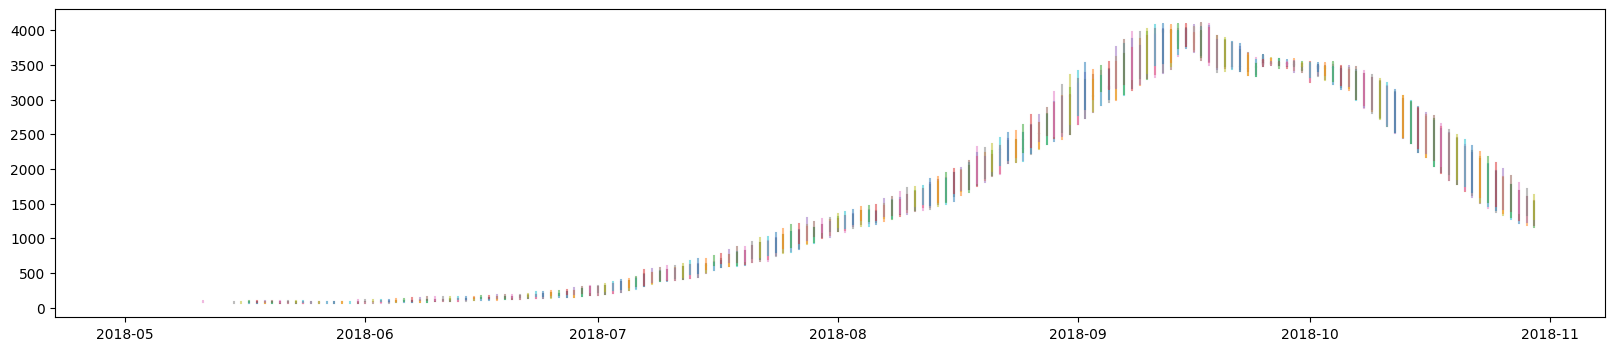

In [279]:
ds_admin_unit_most_gauges, admin_unit_most_gauges = \
    get_datasets_unit_with_most_gauges(dict_datasets)
plot_aggregated_reforecast('2018-05-01', '2018-10-30',
                           ds_admin_unit_most_gauges,
                           dict_datasets_agg[admin_unit_most_gauges])

In [263]:
#! Continue from here. After this create events using the return periods.
#! Then, match those with impact data.